# MIMIC-IV Clinical Notes
The discharge summary often contain a treasure trove of information for the patient, including medical history, disease progression, drug regime, treatment plans and follow-up actions.

In [1]:
import pandas as pd

# Read the first 5 rows of the gzipped CSV file
df = pd.read_csv('./mimic-iv-note-deidentified-free-text-clinical-notes-2.2/note/discharge.csv.gz', compression='gzip')

# Display the dataframe
df.head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-DS-21,10000032,22595853,DS,21,2180-05-07 00:00:00,2180-05-09 15:26:00,\nName: ___ Unit No: _...
1,10000032-DS-22,10000032,22841357,DS,22,2180-06-27 00:00:00,2180-07-01 10:15:00,\nName: ___ Unit No: _...
2,10000032-DS-23,10000032,29079034,DS,23,2180-07-25 00:00:00,2180-07-25 21:42:00,\nName: ___ Unit No: _...
3,10000032-DS-24,10000032,25742920,DS,24,2180-08-07 00:00:00,2180-08-10 05:43:00,\nName: ___ Unit No: _...
4,10000084-DS-17,10000084,23052089,DS,17,2160-11-25 00:00:00,2160-11-25 15:09:00,\nName: ___ Unit No: __...


### Extraction of Discharge Diagnosis
Using Regular expression to extract all the notes taken within the Discharge Diagnosis (all wordings before Discharge Condition)

In [99]:
import re

def extract_diagnosis(text):
    # Look for the pattern 'Discharge Diagnosis:', capture everything until 'Discharge Condition'
    pattern = r'Discharge Diagnosis:(.*?)(?=Discharge Condition)'
    matches = re.search(pattern, text, re.DOTALL)
    if matches:
        return matches.group(1).strip()  # Returns the diagnosis text, stripping any leading/trailing whitespace
    else:
        return "Diagnosis not found"


diagnosis = extract_diagnosis(df.text[133])
print(diagnosis)


Primary diagnosis:
Acute right-sided lenticulostriate territory infarct 
Small acute right posterior frontal subcortical infarct 
Hyperlipidemia

Secondary diagnosis:
History of a left pontine stroke
History of colon cancer 
Cholecystectomy
Diverticulosis
Hemorrhoids


In [100]:
print(df.text[133])

 
Name:  ___                 Unit No:   ___
 
Admission Date:  ___              Discharge Date:   ___
 
Date of Birth:  ___             Sex:   F
 
Service: NEUROLOGY
 
Allergies: 
Iodine; Iodine Containing
 
Attending: ___.
 
Chief Complaint:
gait instabilityq
 
Major Surgical or Invasive Procedure:
none
 
History of Present Illness:
Ms. ___ is a ___ year old woman with hypertension, untreated
hyperlipidemia prior paramedian pontine infarct now presenting
with difficulty walking and slowed speech. She awoke yesterday
morning with difficulty walking and felt her speech my be slower
than normal. The difficulty walking is intermittent and she ___
still able to manage. When she spoke with her friends they told
her that her speech was slow. Friends thought she had a left
facial droop, but when the pt looked in the mirror she thought 
it
was normal. She denies being able to find the right words. 
denied headache, loss of vision, blurred vision, diplopia,
dysarthria, dysphagia, lightheadednes

In [34]:
# Assuming df is your DataFrame and 'text' is the column with discharge summaries
# Apply the function to each row in the 'text' column
df['discharge_diagnosis'] = df['text'].apply(extract_diagnosis)

In [37]:
# Assuming df is your original DataFrame
# Keep only the 'text' and 'discharge_diagnosis' columns
filtered_df = df[['text', 'discharge_diagnosis']]

# Save the filtered DataFrame as a pickle file
filtered_df.to_pickle("mimic_iv_notes.pkl")


In [38]:
filtered_df

,text,discharge_diagnosis
0,\nName: ___ Unit No: _...,Ascites from Portal HTN
1,\nName: ___ Unit No: _...,Primary: diuretic refractory ascites\nSeconda...
2,\nName: ___ Unit No: _...,Primary:\nHypotension\nHyperkalemia\nAcute Kid...
3,\nName: ___ Unit No: _...,PRIMARY DIAGNOSIS\n=================\n-Decompe...
4,\nName: ___ Unit No: __...,___ Dementia
...,...,...
331788,\nName: ___ Unit No: ___...,Giant abdominal hernia with exposed bowel and ...
331789,\nName: ___ Unit No: ___...,# Intra-abdominal infection/abscess\n# Enteroc...
331790,\nName: ___ Unit No: ___\...,Seizure/symptomatic Epilepsy\nStroke
331791,\nName: ___ Unit No: ___\...,Primary Diagnosis:\n1. Status Epilepticus\n.\n...


### Using Name Entity Recognition of pre-trained diagnosis dictionary to extract only the diagnosis here

In [39]:
import pandas as pd
import spacy

# Load the scispaCy model
nlp = spacy.load("en_ner_bc5cdr_md")

# Function to extract diseases from a transcription
def extract_diseases(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "DISEASE"]

# Convert to string
filtered_df['discharge_diagnosis'] = filtered_df['discharge_diagnosis'].astype(str)

# Apply the function to the 'transcription' column
filtered_df['y'] = filtered_df['discharge_diagnosis'].apply(extract_diseases)

C:\Users\adam2\AppData\Roaming\Python\Python39\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\adam2\AppData\Local\Temp\ipykernel_12404\4141597935.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['discharge_diagnosis'] = filtered_df['discharge_diagnosis'].astype(str)
C:\Users\adam2\AppData\Local\Temp\ipykernel_12404\4141597935.py:16: SettingWithCopyWarning: 
A val

In [40]:
filtered_df

,text,discharge_diagnosis,y
0,\nName: ___ Unit No: _...,Ascites from Portal HTN,[]
1,\nName: ___ Unit No: _...,Primary: diuretic refractory ascites\nSeconda...,"[cirrhosis, hyponatremia, COPD]"
2,\nName: ___ Unit No: _...,Primary:\nHypotension\nHyperkalemia\nAcute Kid...,"[Hypotension, Hyperkalemia, Kidney Injury, Cir..."
3,\nName: ___ Unit No: _...,PRIMARY DIAGNOSIS\n=================\n-Decompe...,[cirrhosis]
4,\nName: ___ Unit No: __...,___ Dementia,[]
...,...,...,...
331788,\nName: ___ Unit No: ___...,Giant abdominal hernia with exposed bowel and ...,"[abdominal hernia, fistula]"
331789,\nName: ___ Unit No: ___...,# Intra-abdominal infection/abscess\n# Enteroc...,"[Intra-abdominal infection/abscess, fistula, i..."
331790,\nName: ___ Unit No: ___\...,Seizure/symptomatic Epilepsy\nStroke,"[Epilepsy, Stroke]"
331791,\nName: ___ Unit No: ___\...,Primary Diagnosis:\n1. Status Epilepticus\n.\n...,"[Pneumonia, MCA stroke]"


In [41]:
# Save the filtered DataFrame as a pickle file
filtered_df.to_pickle("mimic_iv_notes.pkl")

In [47]:
filtered_df = pd.read_pickle("mimic_iv_notes.pkl")

In [48]:
filtered_df['normalized_diseases'] = filtered_df['y'].apply(lambda diseases: [disease.lower() for disease in diseases])

In [49]:
filtered_df['normalized_diseases'] = filtered_df['normalized_diseases'].apply(lambda x: list(set(x)) if isinstance(x, list) else [x])

In [50]:
from collections import Counter

# Flatten the list of lists and count occurrences
all_diseases = [disease for sublist in filtered_df['normalized_diseases'] for disease in sublist]
disease_counts = Counter(all_diseases)

# Get the top 100 diseases
top_100_diseases = [disease for disease, count in disease_counts.most_common(100)]
print(top_100_diseases)

['hypertension', 'atrial fibrillation', 'anemia', 'hyperlipidemia', 'pneumonia', 'depression', 'coronary artery disease', 'fracture', 'diabetes mellitus', 'pain', 'copd', 'cirrhosis', 'abdominal pain', 'gerd', 'infection', 'chest pain', 'anxiety', 'htn', 'heart failure', 'cellulitis', 'diabetes', 'hyponatremia', 'dementia', 'encephalopathy', 'acute kidney injury', 'chf', 'esrd', 'cad', 'constipation', 'bacteremia', 'pancreatitis', 'gout', 'myocardial infarction', 'aortic stenosis', 'thrombocytopenia', 'sepsis', 'hematoma', 'acute renal failure', 'syncope', 'diarrhea', 'seizure', 'fractures', 'hypothyroidism', 'chronic kidney disease', 'hypotension', 'urinary tract infection', 'nstemi', 'kidney injury', 'breast cancer', 'dehydration', 'dyslipidemia', 'small bowel obstruction', 'fever', 'stroke', 'bipolar disorder', 'hypercholesterolemia', 'hyperkalemia', 'transaminitis', 'delirium', 'dvt', 'cholangitis', 'pleural effusion', 'orthostatic hypotension', 'acute blood loss anemia', 'pulmonar

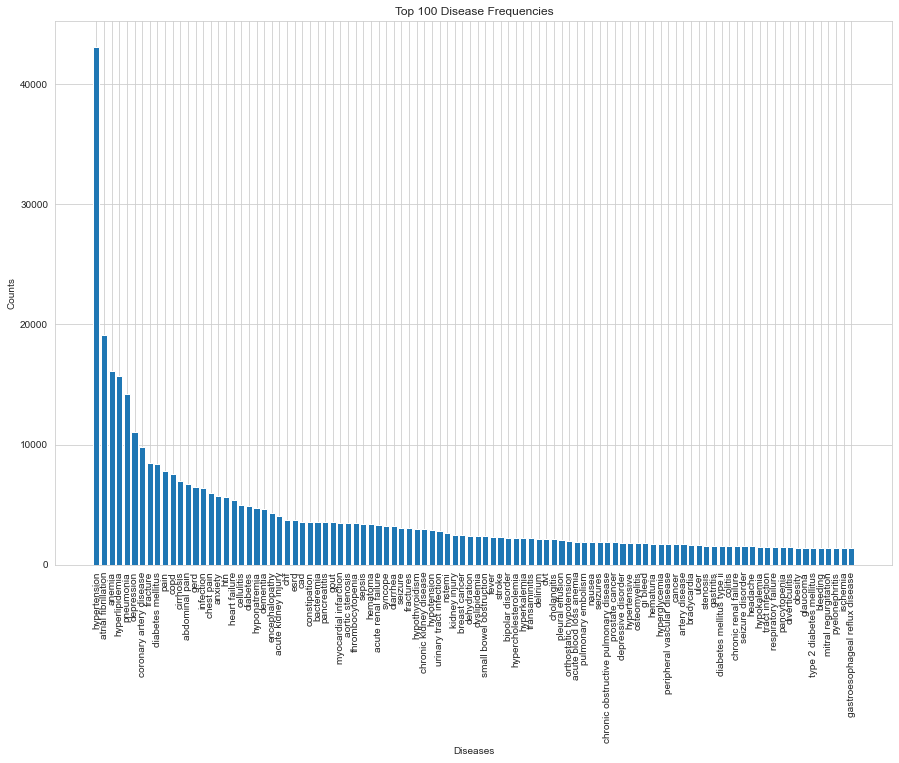

In [51]:
import matplotlib.pyplot as plt

# Extract top diseases and their counts
top_diseases, counts = zip(*disease_counts.most_common(100))

# Create a bar plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.bar(top_diseases, counts)
plt.xlabel('Diseases')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate the x-labels for better readability
plt.title('Top 100 Disease Frequencies')
plt.show()

In [56]:
print(top_diseases[:5])
print(counts[:5])

('hypertension', 'atrial fibrillation', 'anemia', 'hyperlipidemia', 'pneumonia')
(43105, 19108, 16107, 15682, 14228)


### Working with top 5 diagnoses : ('hypertension',  'atrial fibrillation',  'anemia',  'hyperlipidemia',  'pneumonia')

In [57]:
# Define the list of diseases you're interested in
target_diseases = {'hypertension', 'atrial fibrillation', 'anemia', 'hyperlipidemia', 'pneumonia'}

# Remove all terms not in target_diseases
filtered_df['normalized_diseases'] = filtered_df['normalized_diseases'].apply(
    lambda diseases: [disease for disease in diseases if disease in target_diseases])

In [78]:
# Assuming 'normalized_diseases' is the column with disease combinations
combination_counts = filtered_df['normalized_diseases'].value_counts()
combination_counts

[]                                                                        252445
[hypertension]                                                             23166
[pneumonia]                                                                 9675
[atrial fibrillation]                                                       9661
[anemia]                                                                    9441
                                                                           ...  
[pneumonia, atrial fibrillation, hyperlipidemia]                               1
[anemia, hypertension, pneumonia, hyperlipidemia, atrial fibrillation]         1
[pneumonia, anemia, hyperlipidemia]                                            1
[pneumonia, hypertension, atrial fibrillation]                                 1
[pneumonia, anemia, hypertension, atrial fibrillation]                         1
Name: normalized_diseases, Length: 78, dtype: int64

### Retain combinations with more than 1000 count only

In [84]:
# Initialize an empty DataFrame for the filtered data
cleaned_df = pd.DataFrame(columns=filtered_df.columns)

for combination, count in combination_counts.items():
    if count >= 1000:
        # Filter the DataFrame for this combination and concatenate
        filtered_rows = filtered_df[filtered_df['normalized_diseases'].apply(lambda x: x == list(combination))]
        cleaned_df = pd.concat([cleaned_df, filtered_rows], ignore_index=True)

In [86]:
cleaned_df['normalized_diseases'].value_counts()

[]                                                     252445
[hypertension]                                          23166
[pneumonia]                                              9675
[atrial fibrillation]                                    9661
[anemia]                                                 9441
[hyperlipidemia, hypertension]                           7876
[atrial fibrillation, hypertension]                      3901
[hyperlipidemia]                                         3453
[anemia, hypertension]                                   2516
[hyperlipidemia, atrial fibrillation, hypertension]      1580
[pneumonia, hypertension]                                1326
Name: normalized_diseases, dtype: int64

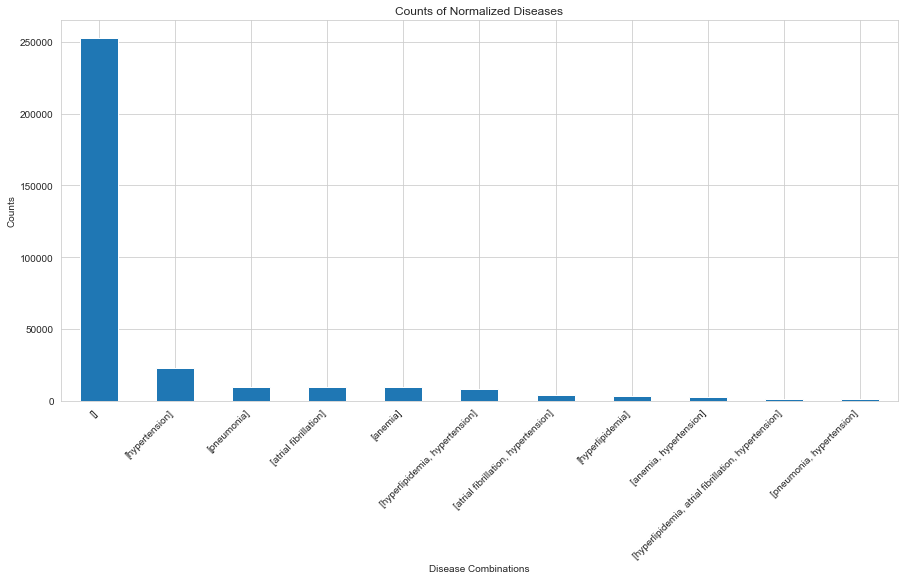

In [88]:
# Assuming 'normalized_diseases' is the column with disease combinations
combination_counts = cleaned_df['normalized_diseases'].value_counts()

# Plotting the combination_counts
combination_counts.plot(kind='bar', figsize=(15, 7))

# Adding labels and title
plt.xlabel('Disease Combinations')
plt.ylabel('Counts')
plt.title('Counts of Normalized Diseases')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

#### Downsample empty class

In [95]:
# Separate the rows with the '[]' class
empty_class_df = cleaned_df[cleaned_df['normalized_diseases'].apply(lambda x: x == [])]

# Downsample the '[]' class
# Example target number is 23166, adjust as needed
downsampled_empty_class_df = empty_class_df.sample(n=23166, random_state=42)

# Separate the rows with non-empty classes
non_empty_class_df = filtered_df[filtered_df['normalized_diseases'].apply(lambda x: x != [])]

# Combine back the downsampled empty class with the non-empty classes
balanced_df = pd.concat([downsampled_empty_class_df, non_empty_class_df], ignore_index=True)

# Shuffle the DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_df

,text,discharge_diagnosis,y,normalized_diseases
0,\nName: ___ Unit No: ___...,POSTOPERATIVE DIAGNOSIS: Adrenal mass.,[],[]
1,\nName: ___ Unit No: ___...,"Primary: Critical limb Ischemia, postoperative...","[Ischemia, postoperative anemia, Atrial fibril...",[atrial fibrillation]
2,\nName: ___ Unit No: ___...,Primary Diagnosis:\nChest pain with possible c...,"[Chest pain, coronary artery disease, ischemia...",[hypertension]
3,\nName: ___ Unit No: ___\...,Pancreatitis\nPortal Vein Thrombosis\nPneumonia,"[Pancreatitis, Thrombosis, Pneumonia]",[pneumonia]
4,\nName: ___ ___ No: ___\n \nAdm...,diarrhea -antibiotic associated\ncopd\nprostat...,"[diarrhea -antibiotic, copd, prostatitis, esop...",[]
...,...,...,...,...
102509,\nName: ___ ___ No: ___\n \nAdm...,"PRIMARY DIAGNOSIS: \n- Abdominal pain, acute o...","[Abdominal pain, Crohn's disease, obstructions...",[]
102510,\nName: ___ Unit No: ___\n...,Primary diagnosis: \nCoronary artery disease w...,"[Coronary artery disease, chest pain, Cervical...",[hypertension]
102511,\nName: ___ Unit No: ...,Choledocholithiasis\nCholelithiasis\nTransamin...,"[Choledocholithiasis, Cholelithiasis, Transami...",[anemia]
102512,\nName: ___ Unit No: ___...,Right ___ finger infection,[],[]


In [96]:
balanced_df = balanced_df[['text', 'normalized_diseases']]
balanced_df.to_pickle("mimic_iv_balanced.pkl")

In [98]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove newline characters
    text = text.replace("\n", " ").replace("\r", " ")

    # Optionally: handle or remove placeholders like "___"
    text = text.replace("___", " ")

    # get English stopwords (consider customizing this list for medical texts)
    english_stopwords = set(stopwords.words('english'))

    # change to lower case (consider keeping case for disease names)
    text = text.lower()

    # divide string into individual words
    tokens = word_tokenize(text)

    # Consider not using stemmer and lemmatizer for preserving medical terms
    clean_tokens = []
    for tok in tokens:
        tok = tok.strip() # remove space
        if tok not in english_stopwords and tok not in string.punctuation:
            clean_tokens.append(tok)

    return " ".join(clean_tokens)


In [99]:
balanced_df['text'] = balanced_df['text'].apply(clean_text)

C:\Users\adam2\AppData\Local\Temp\ipykernel_12404\2859380897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['text'] = balanced_df['text'].apply(clean_text)


In [100]:
balanced_df

,text,normalized_diseases
0,name unit admission date discharge date date b...,[]
1,name unit admission date discharge date date b...,[atrial fibrillation]
2,name unit admission date discharge date date b...,[hypertension]
3,name unit admission date discharge date date b...,[pneumonia]
4,name admission date discharge date date birth ...,[]
...,...,...
102509,name admission date discharge date date birth ...,[]
102510,name unit admission date discharge date date b...,[hypertension]
102511,name unit admission date discharge date date b...,[anemia]
102512,name unit admission date discharge date date b...,[]


In [101]:
balanced_df.to_pickle("mimic_iv_balancedv2.pkl")

In [1]:
import pandas as pd

# Load the pickle file into a pandas DataFrame
balanced_df = pd.read_pickle("mimic_iv_balancedv2.pkl")

In [2]:
balanced_df.shape

(102514, 2)

In [3]:
balanced_df['y'] = balanced_df['normalized_diseases'].apply(lambda x: list(set(x)) if isinstance(x, list) else [x])

In [4]:
balanced_df.text[1]

"name unit admission date discharge date date birth sex service surgery allergies known allergies adverse drug reactions attending chief complaint acute chronic limb ischemia major surgical invasive procedure lle angiogram left knee amputation history present illness hpi history cad s/p cabg afib eliquis s/p r pop bypass l popliteal stent popliteal aneurysms acute chronic limb ischemia pt evaluated leg pain coolness started several day prior admission started heparin drip transferred evaluation patient continues calf pain able move toes sensate dorsum foot reports lives home wife note hard hearing ambulate home walker ros denies chest pain nausea vomiting abdominal pain fevers chills vision loss headaches past medical history pmh cad htn borderline renal failure bilateral popliteal aneurysms s/p stents psh cabg x4 yrs ago bilateral popliteal stents angioplasty re-stenting r popliteal lap ccy social history family history non contributory physical exam vitals 96.6 bp 143/90 hr 85 rr 20 

### Run time too long; going to drastically subset the data

Retain row/combination with 1000 or more;
Downsample rows with >1000 to 1000 only

This should reduce the data set down to 10 multi-class (incld empty) and keep a dataset of 12,000 instead of 102,514

In [5]:
import pandas as pd
from collections import Counter

# Join lists as strings
balanced_df['y_joined'] = balanced_df['y'].apply(lambda x: ', '.join(x))

# Flatten the list
#flat_list = [item for sublist in balanced_df['y_joined'] for item in sublist]

# Count occurrences
count = Counter(balanced_df['y_joined'])

# Display results
print(count)


Counter({'': 23166, 'hypertension': 23166, 'pneumonia': 9675, 'atrial fibrillation': 9661, 'anemia': 9441, 'hyperlipidemia, hypertension': 7952, 'hypertension, atrial fibrillation': 3901, 'hyperlipidemia': 3453, 'anemia, hypertension': 2527, 'hyperlipidemia, hypertension, atrial fibrillation': 1631, 'pneumonia, hypertension': 1346, 'pneumonia, atrial fibrillation': 1023, 'anemia, atrial fibrillation': 946, 'hyperlipidemia, anemia, hypertension': 813, 'anemia, pneumonia': 773, 'hyperlipidemia, atrial fibrillation': 474, 'anemia, hypertension, atrial fibrillation': 460, 'hyperlipidemia, anemia': 334, 'hypertension, pneumonia, atrial fibrillation': 313, 'hyperlipidemia, pneumonia, hypertension': 303, 'hyperlipidemia, anemia, hypertension, atrial fibrillation': 211, 'anemia, pneumonia, hypertension': 209, 'hyperlipidemia, pneumonia': 168, 'anemia, pneumonia, atrial fibrillation': 139, 'hyperlipidemia, hypertension, pneumonia, atrial fibrillation': 97, 'hyperlipidemia, anemia, atrial fibril

In [6]:
import pandas as pd
from collections import Counter

# Count occurrences
count = Counter(balanced_df['y_joined'])

# Create a DataFrame from the Counter object for easier manipulation
count_df = pd.DataFrame.from_dict(count, orient='index', columns=['count'])

# Filter to get the categories with count > 1000
above_1000 = count_df[count_df['count'] > 1000]

# Get the rows corresponding to the categories
above_1000_rows = balanced_df[balanced_df['y_joined'].isin(above_1000.index)]

# For rows with count > 1000, keep only 1000 rows for each type of 'y_joined'
sampled_df = above_1000_rows.groupby('y_joined').sample(n=1000, replace=False, random_state=1)

# Shuffle the dataset
sampled_df = sampled_df.sample(frac=1, random_state=1).reset_index(drop=True)

sampled_df.to_pickle("mimic_iv_sampled_df.pkl")
sampled_df


,text,normalized_diseases,y,y_joined
0,name unit admission date discharge date date b...,[hypertension],[hypertension],hypertension
1,name unit admission date discharge date date b...,"[atrial fibrillation, pneumonia]","[pneumonia, atrial fibrillation]","pneumonia, atrial fibrillation"
2,name unit admission date discharge date date b...,[anemia],[anemia],anemia
3,name unit admission date discharge date date b...,[atrial fibrillation],[atrial fibrillation],atrial fibrillation
4,name unit admission date discharge date date b...,"[pneumonia, hypertension]","[pneumonia, hypertension]","pneumonia, hypertension"
...,...,...,...,...
11995,name unit admission date discharge date date b...,[hypertension],[hypertension],hypertension
11996,name unit admission date discharge date date b...,"[pneumonia, atrial fibrillation]","[pneumonia, atrial fibrillation]","pneumonia, atrial fibrillation"
11997,name unit admission date discharge date date b...,[],[],
11998,name unit admission date discharge date date b...,"[hyperlipidemia, hypertension]","[hyperlipidemia, hypertension]","hyperlipidemia, hypertension"
